## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Read data

In [2]:
df = pd.read_csv("Ice_cream selling data.csv")
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


## Plot data

Text(0, 0.5, 'sales')

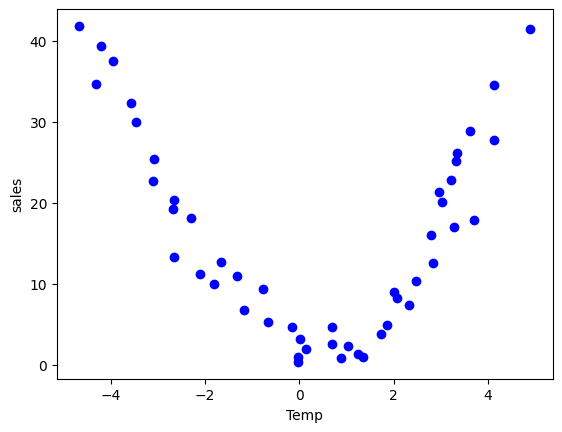

In [3]:
plt.scatter(df["Temperature (°C)"], df["Ice Cream Sales (units)"], color="blue")
plt.xlabel("Temp")
plt.ylabel("sales")

## Separate data 

In [4]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

## Model

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[["Temperature (°C)"]])
train_y = np.asanyarray(train[["Ice Cream Sales (units)"]])

test_x = np.asanyarray(test[["Temperature (°C)"]])
test_y = np.asanyarray(test[["Ice Cream Sales (units)"]])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)

In [7]:
reg = linear_model.LinearRegression()
train_y = reg.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficients:  [[ 0.         -0.94156804  1.78143925]]
Intercept:  [3.34591178]


## Plot result

Text(0, 0.5, 'Sales')

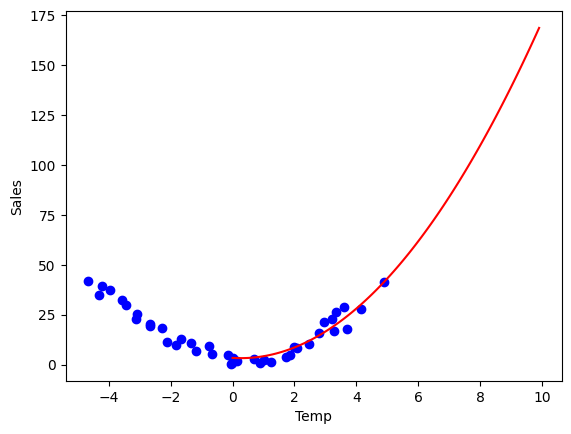

In [8]:
plt.scatter(train["Temperature (°C)"], train["Ice Cream Sales (units)"],  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = reg.intercept_[0]+ reg.coef_[0][1]*XX+ reg.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Temp")
plt.ylabel("Sales")

## Predict

In [9]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = reg.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 3.71
Residual sum of squares (MSE): 15.60
R2-score: 0.86
